In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Read all dataset
df = pd.read_csv('/content/drive/MyDrive/datascience/merch_sales.csv')
df.head()

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


DATA PREPROCESSING

In [ ]:
#Data info
print("\n data info :")
print(df.info())

#Check missing values
print("\n missing values :")
print(df.isnull().sum())

#check data duplicated
print("\n duplicated data :")
print(df.duplicated().sum())

#convert date time
df['Order Date'] = pd.to_datetime(df['Order Date'])


 data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 non-null   int64 
 14  Review                  7394 non-null   ob

DATA VISUALISASI

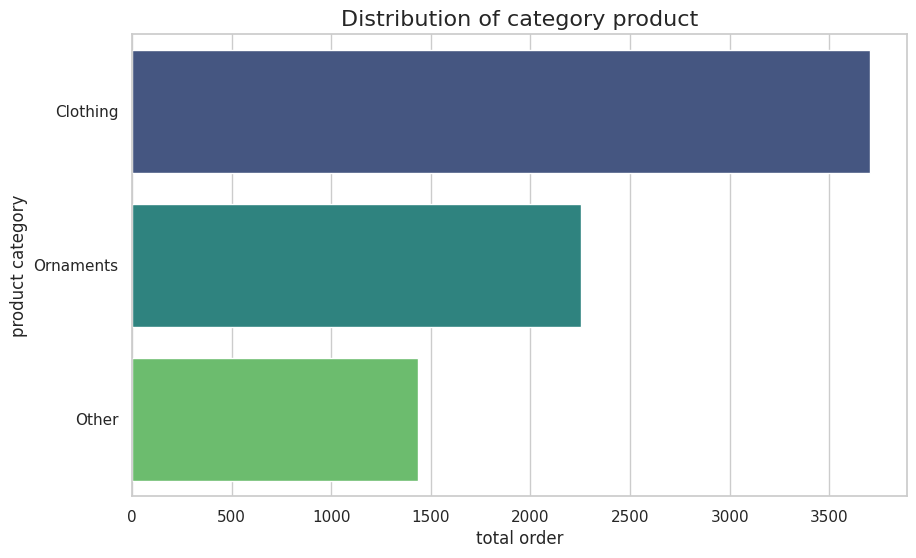

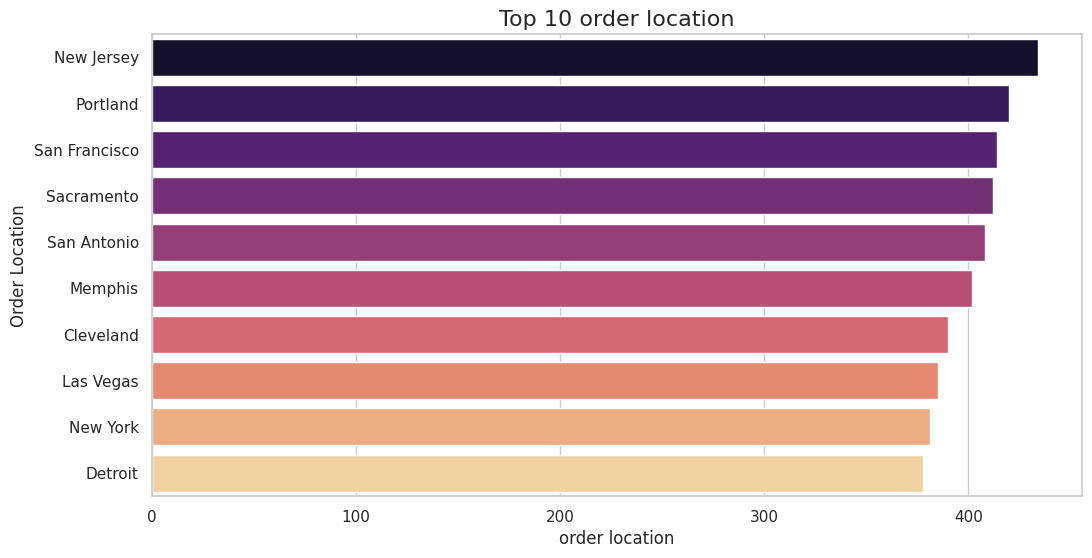

In [16]:
# Set style for plots
sns.set(style="whitegrid")

# 1. Distribusi product category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="Product Category", order=df["Product Category"].value_counts().index, palette="viridis")
plt.title("Distribution of category product", fontsize=16)
plt.xlabel("total order")
plt.ylabel("product category")
plt.show()

# 2. Distribution order location
plt.figure(figsize=(12, 6))
top_locations = df["Order Location"].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("Top 10 order location", fontsize=16)
plt.xlabel("order location")
plt.show()





EXPLORE DATA ANALYSIS

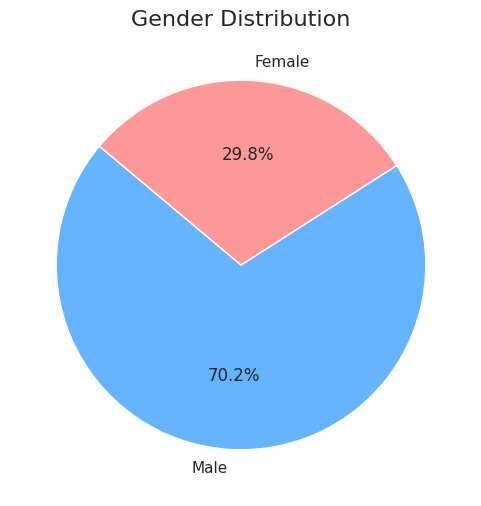

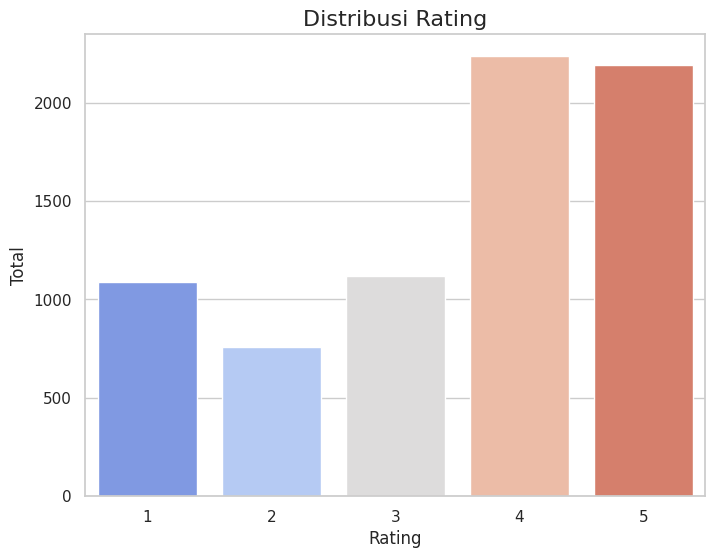

In [17]:
# 3. Distribusi gender
plt.figure(figsize=(6, 6))
gender_counts = df["Buyer Gender"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=["#66b3ff", "#ff9999"])
plt.title("Gender Distribution", fontsize=16)
plt.show()

# 4. Distribution Rating
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x="Rating", palette="coolwarm")
plt.title("Distribusi Rating", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Total")
plt.show()


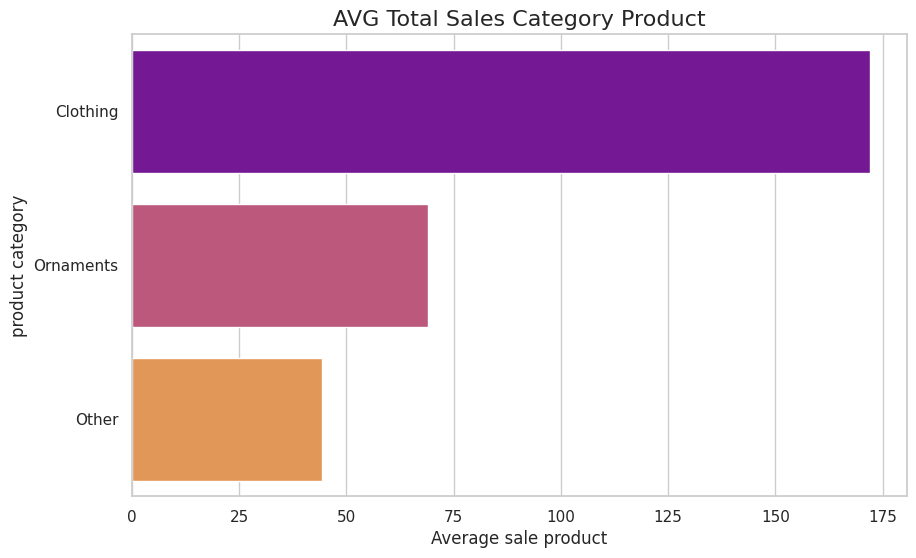

In [18]:
# 5.average Total sales product category
avg_sales_by_category = df.groupby("Product Category")["Total Sales"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_category.values, y=avg_sales_by_category.index, palette="plasma")
plt.title("AVG Total Sales Category Product", fontsize=16)
plt.xlabel("Average sale product")
plt.ylabel("product category")
plt.show()

In [19]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.drop('Order ID', axis = 1 ,inplace = True)

UNIVARIAT ANALYISIS

In [20]:
 numeric_df.describe()

,Buyer Age,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating
count,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000
mean,26.455504,55.165404,14.633487,69.798891,1.668109,115.832026,3.499053
std,5.208202,39.575614,24.815719,46.702326,1.081398,118.067960,1.389731
min,18.000000,9.000000,0.000000,9.000000,1.000000,9.000000,1.000000
25%,22.000000,15.000000,0.000000,20.000000,1.000000,40.000000,3.000000
50%,26.000000,65.000000,0.000000,65.000000,1.000000,90.000000,4.000000
75%,31.000000,97.000000,40.000000,100.000000,2.000000,137.000000,5.000000
max,35.000000,130.000000,100.000000,230.000000,5.000000,1000.000000,5.000000


In [21]:
numeric_df1 = round(numeric_df.corr(),2)
numeric_df1

,Buyer Age,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating
Buyer Age,1.00,-0.00,-0.01,-0.01,0.01,0.00,0.01
Sales Price,-0.00,1.00,-0.00,0.85,-0.02,0.54,-0.01
Shipping Charges,-0.01,-0.00,1.00,0.53,0.01,0.35,0.01
Sales per Unit,-0.01,0.85,0.53,1.00,-0.01,0.65,-0.00
Quantity,0.01,-0.02,0.01,-0.01,1.00,0.63,0.01
Total Sales,0.00,0.54,0.35,0.65,0.63,1.00,0.01
Rating,0.01,-0.01,0.01,-0.00,0.01,0.01,1.00


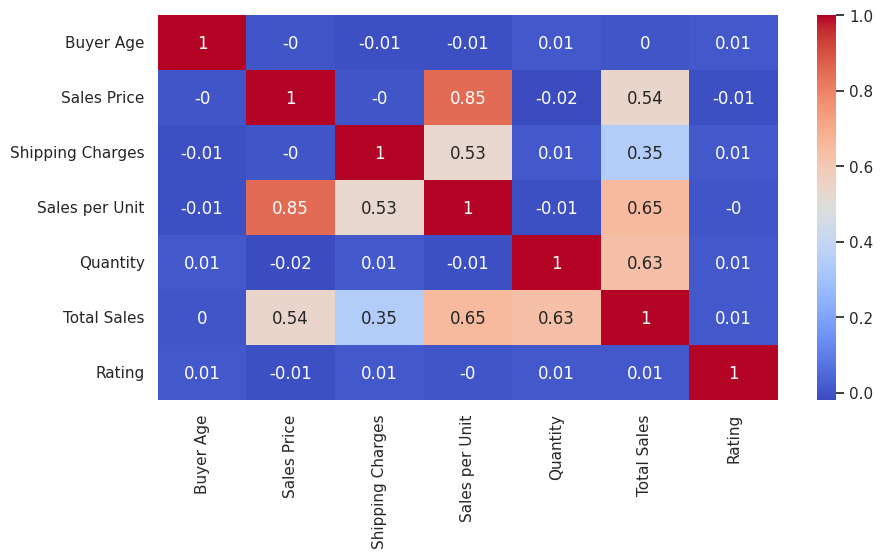

In [22]:
plt.figure(figsize = (10,5))
sns.heatmap(numeric_df1, annot = True, cmap = 'coolwarm')
plt.show()

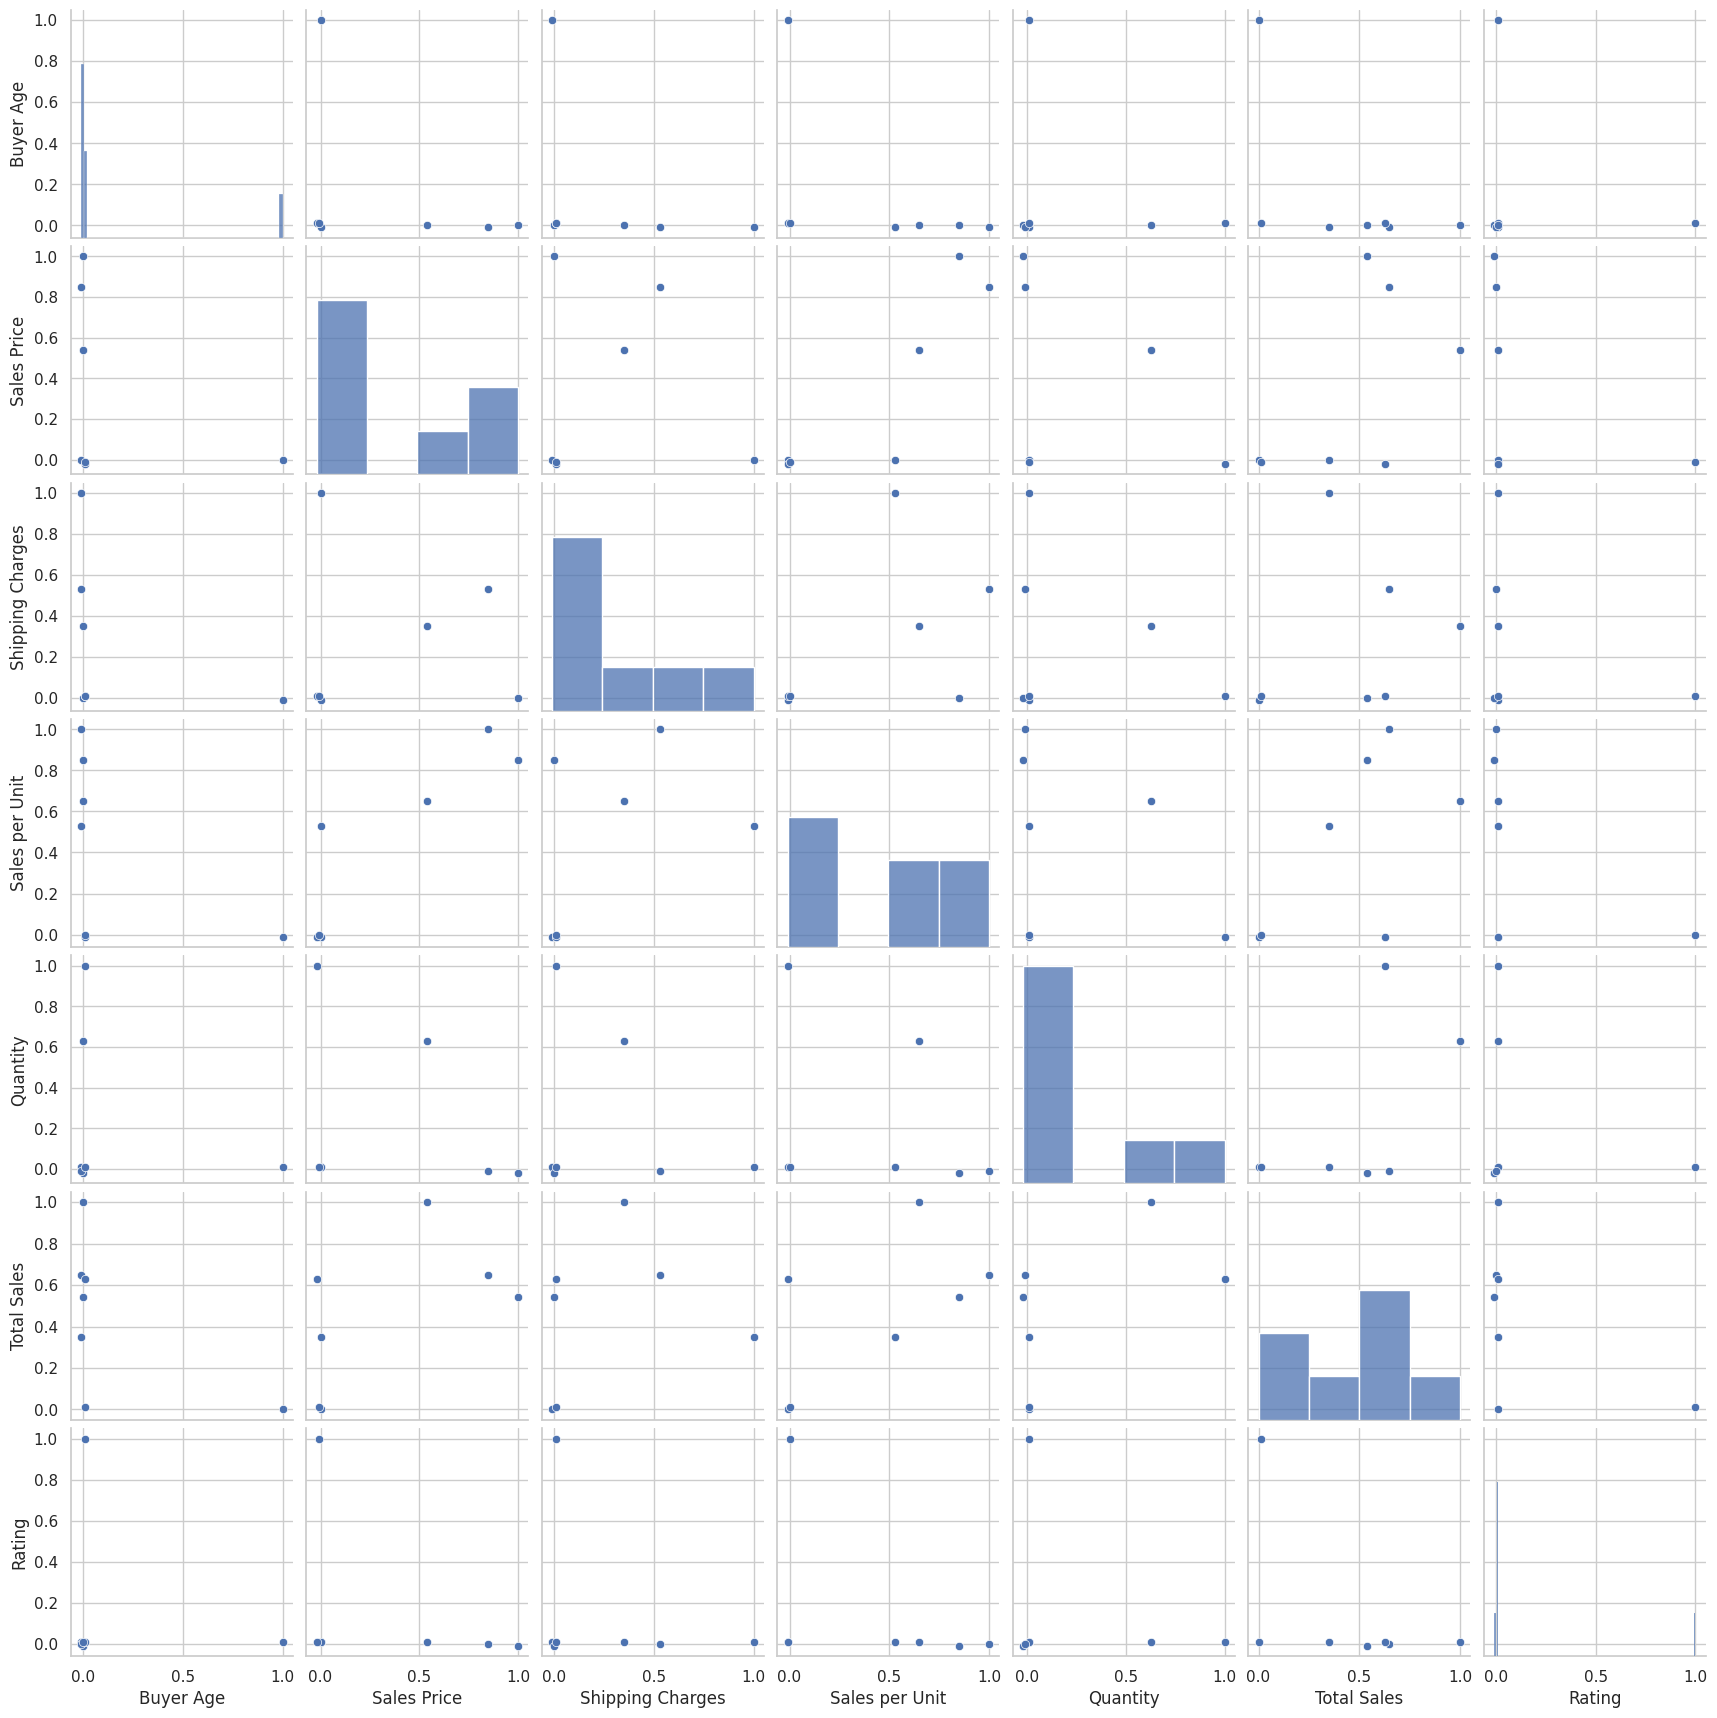

In [23]:
sns.pairplot(numeric_df1)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Train dataset
from sklearn.model_selection import train_test_split
X = numeric_df.drop('Total Sales', axis = 1)
y = numeric_df['Total Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

2.70039351801359

The RMSE value at the end of the code is the primary outcome. It quantifies how well the RandomForestRegressor model predicts the Total Sales based on the features in the dataset.

A smaller RMSE indicates better model performance, while a larger RMSE suggests room for improvement in the model, potentially through parameter tuning, feature engineering, or data preprocessing.